In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

In [83]:
#%run graphing_function_recent.py
from graphing_function_recent import total_seconds, likelihood_check, dataframe_ranges, convert_time, audio_timing, time_set_zero, convert_data, single_mouse_data, displacement, speed, angle, angle_speed, trajectory, head_angle_trajectory_figure, speed_figure, displacement_figure, head_angle_figure, linearity_ratio, angle_speed_figure, escape_time, filter_data, shelter_rotation
from V3_M1 import coord_scaled as M1_coord_scaled, escape_only as M1_escape_only, four_second as M1_four_second, six_second as M1_six_second, long_range as M1_long_range, initial_displacement as M1_intial_displacement, total_distance as M1_total_distance

from V3_M2 import coord_scaled as M2_coord_scaled, escape_only as M2_escape_only, four_second as M2_four_second, six_second as M2_six_second, long_range as M2_long_range, initial_displacement as M2_intial_displacement, total_distance as M2_total_distance

from V3_M3 import coord_scaled as M3_coord_scaled, escape_only as M3_escape_only, four_second as M3_four_second, six_second as M3_six_second, long_range as M3_long_range, initial_displacement as M3_intial_displacement, total_distance as M3_total_distance

from V3_M4 import coord_scaled as M4_coord_scaled, escape_only as M4_escape_only, four_second as M4_four_second, six_second as M4_six_second, long_range as M4_long_range, initial_displacement as M4_intial_displacement, total_distance as M4_total_distance

from V3_M7 import coord_scaled as M5_coord_scaled, escape_only as M5_escape_only, four_second as M5_four_second, six_second as M5_six_second, long_range as M5_long_range, initial_displacement as M5_intial_displacement, total_distance as M5_total_distance

from V3_M8 import coord_scaled as M6_coord_scaled, escape_only as M6_escape_only, four_second as M6_four_second, six_second as M6_six_second, long_range as M6_long_range, initial_displacement as M6_intial_displacement, total_distance as M6_total_distance

from V3_M9 import coord_scaled as M7_coord_scaled, escape_only as M7_escape_only, four_second as M7_four_second, six_second as M7_six_second, long_range as M7_long_range, initial_displacement as M7_intial_displacement, total_distance as M7_total_distance

from V3_M10 import coord_scaled as M8_coord_scaled, escape_only as M8_escape_only, four_second as M8_four_second, six_second as M8_six_second, long_range as M8_long_range, initial_displacement as M8_intial_displacement, total_distance as M8_total_distance


In [6]:
from compiled_functions_displacement import mouse_columns_displacement, displacement_data, normalize, summarize_data, plot_compiled_displacement, plot_all_displacement

from compiled_functions_speed import mouse_columns_speed, speed_data, plot_compiled_speed, plot_all_speed

from compiled_functions_angle import mouse_columns_angle, angle_data, plot_compiled_angle, plot_all_angle

from compiled_trajectory import mouse_columns_x, mouse_columns_y, path_data, summarize_path, plot_trajectory

In [88]:
def displacement_data(n, start, stop, step, string):
    time = np.arange(start,stop,step)
    mouse_id = pd.DataFrame()
    mouse_id['time'] = time

    mouse_id.reset_index(drop = True)
    for i in range (1, n+1):
        column_name = f'M{i}_displacement'
        Mi_displacement = globals()[f'M{i}_' + string]['displacement'].reset_index(drop=True)

        mouse_id[column_name] = pd.Series(Mi_displacement, index = mouse_id.index)
        
    return mouse_id

#couldn't run without passing in M1_stimulus....


#for speed:
def speed_data(n, start, stop, step, string):
    time = np.arange(start,stop,step)
    mouse_id = pd.DataFrame()
    mouse_id['time'] = time

    mouse_id.reset_index(drop = True)
    for i in range (1, n+1):
        column_name = f'M{i}_speed'
        Mi_speed = globals()[f'M{i}_' + string]['speed'].reset_index(drop=True)

        mouse_id[column_name] = pd.Series(Mi_speed, index = mouse_id.index)
        
    return mouse_id

def angle_data(n, start, stop, step, string):
    time = np.arange(start,stop,step)
    mouse_id = pd.DataFrame()
    mouse_id['time'] = time

    mouse_id.reset_index(drop = True)
    for i in range (1, n+1):
        column_name = f'M{i}_angle'
        Mi_angle = globals()[f'M{i}_' + string]['head_angle'].reset_index(drop=True)

        mouse_id[column_name] = pd.Series(Mi_angle, index = mouse_id.index)
        
    return mouse_id

In [154]:
interpolate_data(-2, 4, .04, 'displacement', M1_four_second)

[ 5.08494292  5.08472978  5.08410339  5.08275159  5.08078186  5.08099535
  5.12394804  5.32757032  5.67364591  5.98518209  6.28125552  6.65272666
  7.06802534  7.43433721  7.86876027  8.3196231   8.86242007  9.3532896
  9.90999414 10.45024698 10.87797208 11.10712611 11.23094289 11.37009101
 11.42398935 11.57551106 12.02656335 12.67764579 13.28976116 13.91043984
 14.54882668 15.20734197 15.90764718 16.61909559 17.37400851 18.06062296
 18.86086089 19.72755988 20.37651679 20.91324733 21.47985367 22.09229785
 22.52926226 22.7896505  22.876871   22.92037111 23.05623646 23.24983279
 23.55771854 23.77541129 23.76492052 23.75468073 23.63466657 23.39972378
 23.37251754 23.38444602 23.41180488 23.45707264 23.56946888 23.63696312
 23.65206554 23.6466234  23.6012442  23.45396525 23.17837214 22.91509882
 22.80719266 22.67636456 22.5286158  22.15666954 21.54120491 20.90225356
 20.15358684 19.19257616 18.14031861 16.88226992 15.4831119  14.11620938
 13.10660255 12.23860609 11.2037031  10.3661196   9.

In [155]:
#create a new dataframe with interpolated displacement, speed, or head angle (choose string)
def interpolate_data(start, stop, step, string, df):
    interpolate = pd.DataFrame()
    
    time = np.arange(start,stop,step)
    interpolate['time'] = time
    
    #interpolate displacement data
    displacement_raw = df[string]
    time_raw = df['time_set']
    
    displacement_inter = np.interp(time, time_raw, displacement_raw)
    
    return displacement_inter

In [158]:
def interpolate_all(n, start, stop, step, column_string, df_string):
    compiled_name = column_string + '_interpolated'
    compiled_name = pd.DataFrame()
    
    for i in range(1, n+1):
        name = f'M{i}_' + df_string #ex: look at just four_second
        df = globals()[name]
        
        interpolated_data = interpolate_data(start, stop, step, column_string, df)
        compiled_name[name + '_interpolated'] = interpolated_data
    
    time = np.arange(start,stop,step)  
    compiled_name['time'] = time
    
    print(compiled_name)

In [159]:
interpolate_all(8, -2, 4, .04, 'displacement', 'four_second')

     M1_four_second_interpolated  M2_four_second_interpolated  \
0                       5.084943                    18.759692   
1                       5.084730                    19.115068   
2                       5.084103                    19.691209   
3                       5.082752                    20.117343   
4                       5.080782                    20.459715   
..                           ...                          ...   
145                     3.956472                     7.624235   
146                     3.945876                     8.165801   
147                     3.943569                     8.904445   
148                     3.942849                     9.772875   
149                     3.944105                    10.562047   

     M3_four_second_interpolated  M4_four_second_interpolated  \
0                      14.977317                    13.996695   
1                      15.244283                    14.372734   
2                      1

In [125]:
mouse_disp = displacement_data(8, -2, 4, .04, 'four_second')

In [46]:
#for displacement
mice_displacement = mouse_columns_displacement(8)
displacement = displacement_data(8, -.98,4.02, .04, 'four_second')
summarize_data(mice_displacement, displacement)

#displacement_range = displacement_data(8, -.98, 9.62, .04, 'stimulus_range')
#summarize_data(mice_displacement, displacement_range)

In [48]:
def mouse_columns(n, string):
    mice = [f'M{i}_' + string for i in range(1, n+1)]
    return mice

In [96]:
mice_initial_displacement = mouse_columns(8, 'initial_displacement')
mice_total_distance = mouse_columns(8, 'total_distance')
mice_displacement = mouse_columns(8, 'displacement')

In [65]:
mouse_id = pd.DataFrame()
def combine_data(n, start, stop, step, mice, column_string, dataframe_string):
    column_string = pd.DataFrame()  #make a dataframe labeled column_string (ex: displacement)
    time = np.arange(start,stop,step) #set the time frame you want to look at and add it to dataframe
    column_string['time'] = time

    #reset index to start at 0
    column_string.reset_index(drop = True)
    
    #go through each mouse (n)
    for i in range (1, n+1):
        column_name = mice[i]  #choose which list - ex M1_displacement, M2_displacement...
        Mi_data = globals()[f'M{i}_' + dataframe_string][column_string].reset_index(drop=True)  #choose dataframe (ex: four_second) and column (ex: displacement)
        Mi_time = globals()[f'M{i}_' + dataframe_string]['time_set'].reset_index(drop=True)
        
        print(Mi_data)
        #Mi_data_array = Mi_data.to_numpy()
        #Mi_time = Mi_time.to_numpy()
        
        #interpolate displacement based on og time and exact frame rate
        #Mi_interpolated_data = np.interp(time, Mi_time, Mi_data)

        #create new column for interpolated displacement in mouse_id ('Mi_displacement')
        #column_string[column_name] = pd.Series(Mi_interpolated_data, index = column_string.index)


In [100]:
#plot graph of total initial distance vs displacement of mouse 
def linearity_ratio(mice_distance, mice_displacement):
    plt.figure()
    ax = plt.axes()
    
    for i in range(len(mice_distance)):
        column_name_1 = mice_distance[i]
        yi = column_name_1
        
        column_name_2 = mice_displacement[i]
        xi = column_name_2
        plt.plot(xi,yi)
        
    ax.set_xlabel('Total distance from shelter at stimulus initiation (cm)')
    ax.set_ylabel('Total displacement of mouse during escape (cm)')
    ax.set_title('Linearity of escape')
    
    plt.xlim(min(x), max(x))

    #Remove the box
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    plt.show()

In [7]:
#for speed
mice_speed = mouse_columns_speed(8)
speed = speed_data(8,-.98, 4.02, .04, 'stimulus')
summarize_data(mice_speed, speed)

speed_range = speed_data(8, -.98, 9.62, .04, 'stimulus_range')
summarize_data(mice_speed, speed_range)

In [8]:
#for head angle
mice_angle = mouse_columns_angle(8)
angle = angle_data(8,-.98, 4.02, .04, 'stimulus')
summarize_data(mice_angle, angle)

angle_range = angle_data(8, -.98, 9.62, .04, 'stimulus_range')
summarize_data(mice_angle, angle_range)

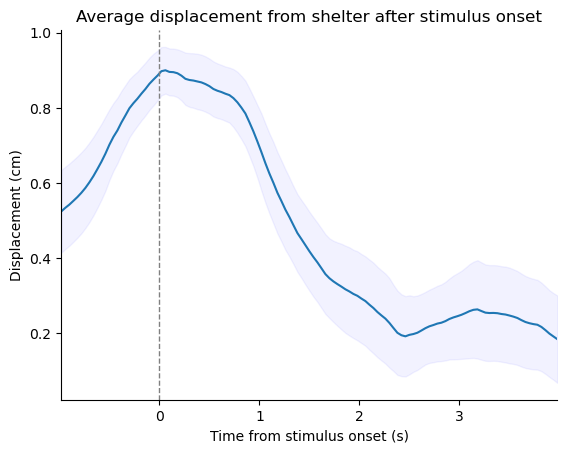

In [9]:
plot_compiled_displacement(displacement,7, 4)

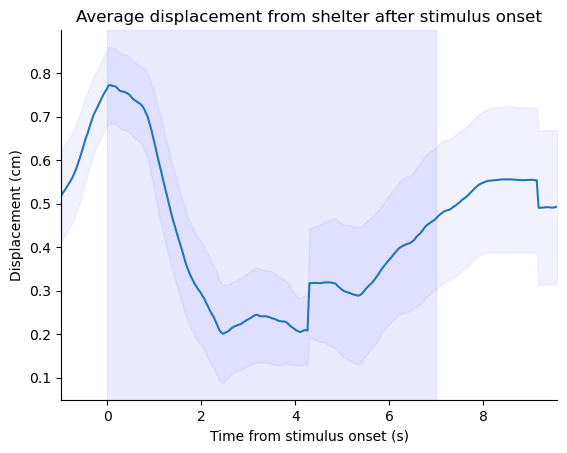

In [10]:
plot_compiled_displacement(displacement_range, 7,9)

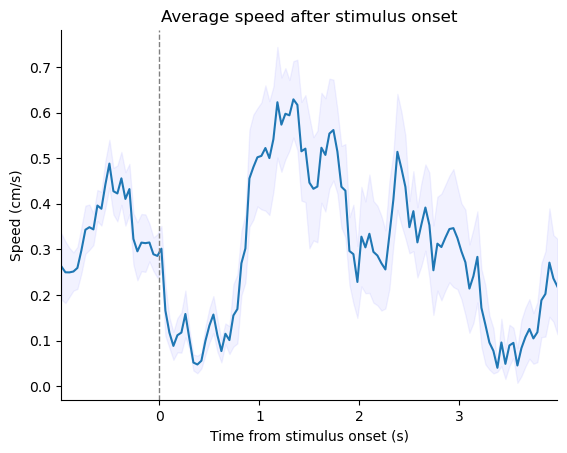

In [11]:
plot_compiled_speed(speed, 7,4)

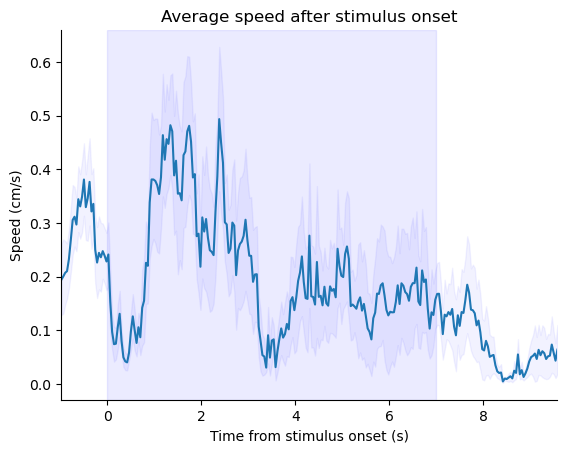

In [12]:
plot_compiled_speed(speed_range,7,9)

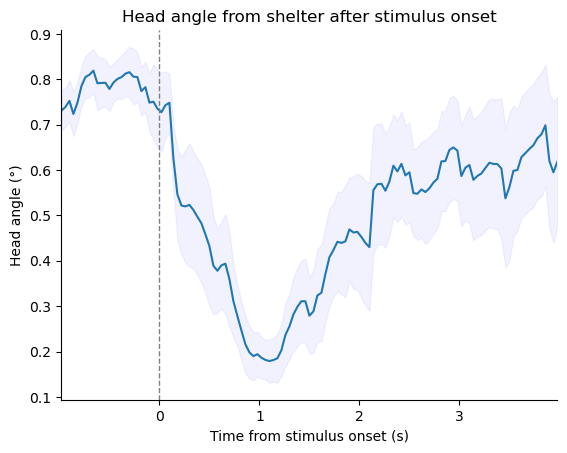

In [13]:
plot_compiled_angle(angle, mice_angle,4)

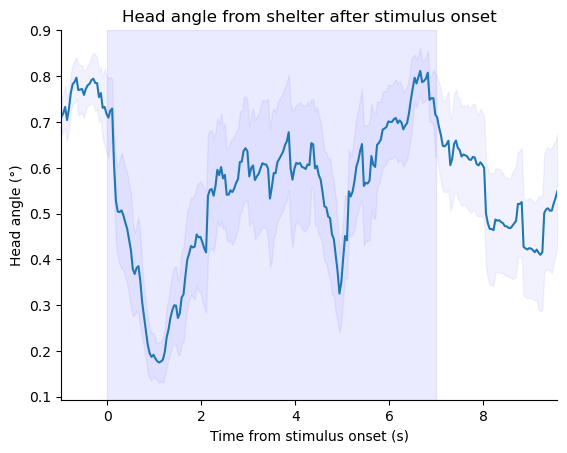

In [15]:
plot_compiled_angle(angle_range,7,9)

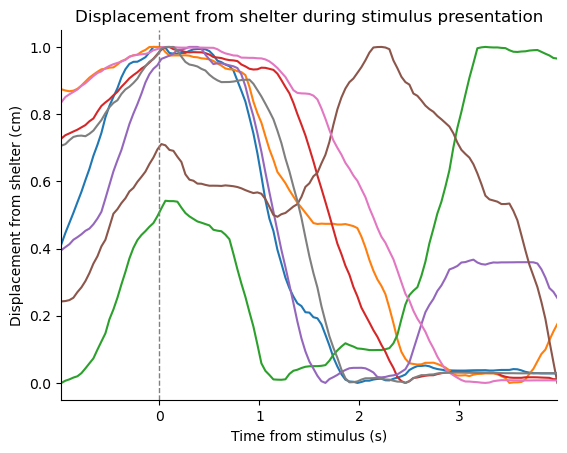

In [18]:
plot_all_displacement(displacement, mice_displacement, 7, 4)

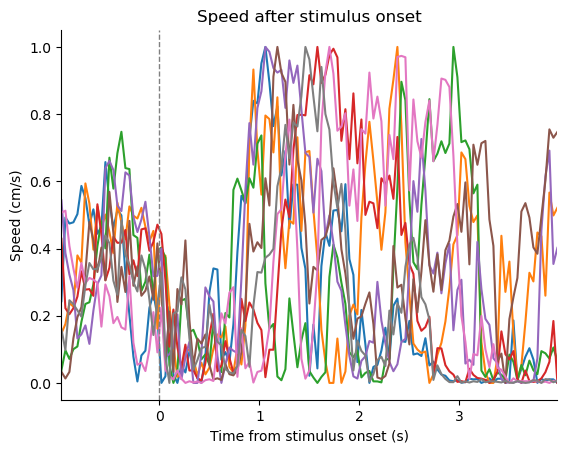

In [21]:
plot_all_speed(speed, mice_speed, 4, 4)

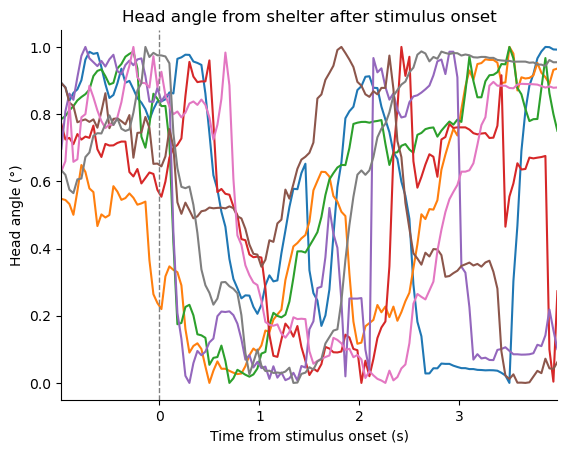

In [23]:
plot_all_angle(angle, mice_angle,4,4)

In [24]:
displacement

,time,M1_displacement,M2_displacement,M3_displacement,M4_displacement,M5_displacement,M6_displacement,M7_displacement,M8_displacement,average,SEM_up,SEM_down
0,-0.98,0.413354,0.873934,0.000000,0.727603,0.395380,0.242601,0.835533,0.706193,0.524325,0.634252,0.414398
1,-0.94,0.446523,0.870335,0.006588,0.737295,0.404188,0.243658,0.851035,0.710629,0.533781,0.643418,0.424145
2,-0.90,0.476292,0.868030,0.010595,0.742687,0.412778,0.246489,0.858943,0.722395,0.542276,0.651682,0.432870
3,-0.86,0.506118,0.869837,0.015905,0.748303,0.426062,0.253499,0.865954,0.732117,0.552224,0.661199,0.443250
4,-0.82,0.537671,0.875280,0.019761,0.753641,0.433696,0.270243,0.873289,0.735303,0.562360,0.670758,0.453963
...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.82,0.028468,0.086111,0.985354,0.016025,0.338321,0.240910,0.007667,0.028826,0.216460,0.334325,0.098596
121,3.86,0.028345,0.099179,0.979751,0.015562,0.313584,0.190476,0.007721,0.028994,0.207952,0.324476,0.091428
122,3.90,0.028257,0.127364,0.974578,0.015113,0.282377,0.124879,0.007721,0.029150,0.198680,0.314215,0.083145
123,3.94,0.028345,0.153020,0.967036,0.011089,0.271099,0.061966,0.007514,0.029039,0.191139,0.306516,0.075762


In [25]:
def mouse_columns_path(n):
    mice = [f'M{i}_path' for i in range(1, n+1)]
    return mice

In [26]:
mice_x = mouse_columns_x(8)
mice_y = mouse_columns_y(8)

In [28]:
all_dataframes = path_data(8)

In [30]:
summarize_path(8, all_dataframes)

In [31]:
def plot_trajectory(n, df):    
    fig = plt.figure()  #create figure to fill in
    ax = plt.axes()
    
    for i in range(1,n+1):
        xi = df[i-1].iloc[:,0]
        xf = df[i-1].iloc[:,0].iloc[-1] #final x coordinate
        xo = df[i-1].iloc[:,0].iloc[-2] #second to last x coordinate
    
        yi = df[i-1].iloc[:,1]
        yf = df[i-1].iloc[:,1].iloc[-1] #final y coordinate
        yo = df[i-1].iloc[:,1].iloc[-2] #second to last y coordinate
        
        #plt.plot(xi,yi)
        ax.plot(xi,yi, color = 'blue', linewidth = 1)

    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction



        plt.arrow(xo, yo, xf-xo, yf-yo, head_width = .02, head_length = .02, fc = 'blue', ec = "none")
        ax.set_title('Trajectory during stimulus')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)

        plt.axis('off')

        
    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

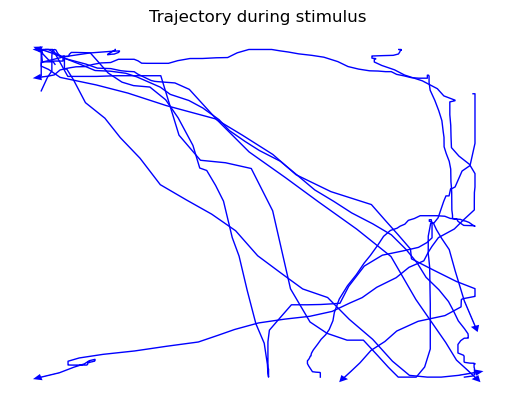

In [32]:
plot_trajectory(8, all_dataframes)

In [49]:



    
x = np.array([2])
y = np.array([1])

coord = np.vstack((x,y))
    
#rotated_coords = rotation_matrix @ coords
    
#df['rotated_x'] = rotated_coords[:,0]
#df['rotated_y'] = rotated_coords[:,1]

In [54]:
print(y)

[1]


In [55]:
rotated_coords = rotation_matrix @ coords

rotated_x = rotated_coords[:,0]
rotated_y = rotated_coords[:,1]

In [57]:
print(rotated_x)

[0. 0.]


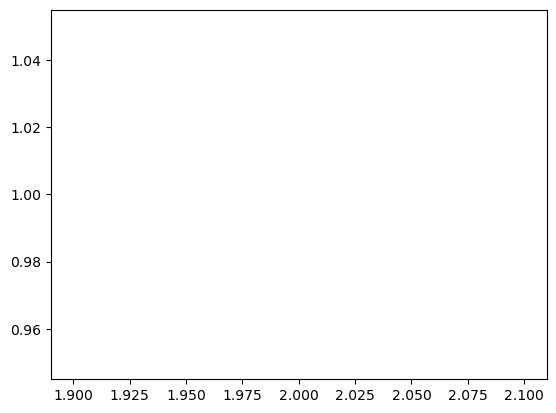

In [52]:
plt.figure()
ax = plt.axes()

ax.plot(x,y)
plt.show()

In [79]:
M1_escape_only
initial_x = M1_escape_only['center_x'].iloc[0]
initial_y = M1_escape_only['center_y'].iloc[0]
center_x_zeroed = M1_escape_only['center_x'] - initial_x
center_y_zeroed = M1_escape_only['center_y'] - initial_y
    
shelter_x_zeroed = -2.015991471215351 - initial_x
shelter_y_zeroed = -24.34403669724771 - initial_y
    
delta_x_shelter = shelter_x_zeroed
delta_y_shelter = shelter_y_zeroed 
vector_shelter = np.sqrt(delta_x_shelter**2 + delta_y_shelter**2)
    
    
    #vector to chosen location: (0,30 - vertical line)
delta_x_point = 0
delta_y_point = 30 - initial_y
vector_point = np.sqrt(delta_x_point**2 + delta_y_point**2)
    
    
    #find the angle between the two points with cross product: 
dot = delta_x_shelter * delta_x_point + delta_y_shelter * delta_y_point
rotation_angle = np.arccos(dot / (vector_shelter * vector_point))

In [81]:
cos_theta = np.cos(rotation_angle)
sin_theta = np.sin(rotation_angle)
rotation_matrix = np.array([[cos_theta, -sin_theta], [sin_theta, cos_theta]])

In [82]:

initial_x = M1_escape_only['center_x'].iloc[0]
initial_y = M1_escape_only['center_y'].iloc[0]

center_x_zeroed = M1_escape_only['center_x'] - initial_x
center_y_zeroed = M1_escape_only['center_y'] - initial_y




In [83]:
coords = np.vstack((center_x_zeroed, center_y_zeroed))

In [84]:
rotated_coords = rotation_matrix @ coords

In [85]:
M1_escape_only['rotated_x'] = rotated_coords[0]
M1_escape_only['rotated_y'] = rotated_coords[1]

C:\Users\ChenLab\AppData\Local\Temp\ipykernel_14860\2194898722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M1_escape_only['rotated_x'] = rotated_coords[0]
C:\Users\ChenLab\AppData\Local\Temp\ipykernel_14860\2194898722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  M1_escape_only['rotated_y'] = rotated_coords[1]


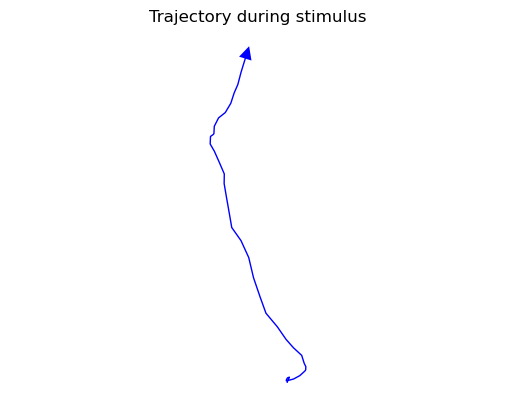

In [89]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
plt.axis('equal')

x = M1_escape_only['rotated_x']
y = M1_escape_only['rotated_y']

ax.plot(x,y, color = 'blue', linewidth = 1)


    #add an arrow to show mouse's direction
    #add an arrow to show mouse's direction
xf = M1_escape_only['rotated_x'].iloc[-1] #final x coordinate
xo = M1_escape_only['rotated_x'].iloc[-2] #second to last x coordinate

yf = M1_escape_only['rotated_y'].iloc[-1] #final y coordinate
yo = M1_escape_only['rotated_y'].iloc[-2] #second to last y coordinate


plt.arrow(xo, yo, xf-xo, yf-yo, head_width = 1, head_length = 1, fc = 'blue', ec = "none")
ax.set_title('Trajectory during stimulus')  #would be after stimulus
ax.set_xlabel('x-position (cm)', fontsize=12)
ax.set_ylabel('y-position (cm)', fontsize=12)

plt.axis('off')

        
plt.show()